## Dependencias

In [67]:
import sys
import numpy as np
import matplotlib
import time
%matplotlib inline
import matplotlib.pyplot as plt
from enum import Enum, auto
import math


## Ejercicio 1

### Datos

In [68]:
a_matrix =         np.array([[ 1,  1,  1,  1, 10],
                    [ 1,  1,  1,  1, 11],
                    [ 1,  1,  1,  1, 12],
                    [ 1,  1,  1,  1, 13]]).astype(np.float64)
a_matrix

array([[ 1.,  1.,  1.,  1., 10.],
       [ 1.,  1.,  1.,  1., 11.],
       [ 1.,  1.,  1.,  1., 12.],
       [ 1.,  1.,  1.,  1., 13.]])

### Implementación

In [69]:
##item a
def elim_gauss_sin_pivot(M): 
   for i in range(0, len(M[0]) - 2):
    for j in range(i+1, len(M)):
      if M[i][i] != 0: #CAMBIAR!!! NO SE PUEDE COMPARAR CON CEROOOOOOOO!!! OJO 
        m_ji = M[j][i]/M[i][i]
        for k in range(i,len(M[0])):
          M[j][k] = M[j][k] - m_ji * M[i][k]
      else:
        for jerror in range(i+1, len(M)):
          if M[jerror][i] != 0: #CAMBIAR!!! NO SE PUEDE COMPARAR CON CEROOOOOOOO!!! OJO 
            raise Exception("No se puede realizar la eliminacion gaussiana con i:" + str(i) + " y j: " + str(j))
   return M

def solve_sys_EGsin(M):
  M_res = elim_gauss_sin_pivot(M)
  x = back_subs(M_res)
  return x

def back_subs(M):
  n = len(M)
  x=[]
  for i in range(n):
    x.append(np.float64(0))
  for i in reversed(range(n)):
    x[i]= (M[i][n-1])
    if(M[i][i]!=0.0):
      for j in range(i+1,n):
        if(M[i][j]!=0.0):
          x[i]= x[i]- M[i][j]*x[j] 
      x[i] = x[i]/M[i][i]
    else:
      x[i]= f"x{i}"
  return x

elim_gauss_sin_pivot(a_matrix)
#solve_sys_EGsin(a_matrix)



array([[ 1.,  1.,  1.,  1., 10.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0.,  0.,  3.]])

## Ejercicio 2

### Datos

In [70]:
b_matrix =         np.array([[ 1,  1,  1,  1, 10],
                    [ 1,  1,  1,  1, 11],
                    [ 1,  2,  1,  1, 12],
                    [ 1,  2,  1,  1, 13]]).astype(np.float64)

a_matrix2 = np.array([[ 1,  1,  0,  0, 0],
                     [ 2,  0,  0,  0, 0],
                     [ 0,  2,  1,  4, 0],
                     [ 0,  0,  2,  1, 0]]).astype(np.float64)

#Funcion para la experimentacion del item c)
def create_matrix_with_epsilon_float64(epsilon):
    c_matrix = np.array([[ 1.0,  2.0+epsilon,  3.0-epsilon,  6.0],
                     [ 1.0-epsilon,  2.0,  3.0+epsilon,  6.0],
                     [ 1.0+epsilon,  2.0-epsilon,  3.0,  6.0]]).astype(np.float64)
    return c_matrix

def create_matrix_with_epsilon_float32(epsilon):
    c_matrix = np.array([[ 1.0,  2.0+epsilon,  3.0-epsilon,  6.0],
                     [ 1.0-epsilon,  2.0,  3.0+epsilon,  6.0],
                     [ 1.0+epsilon,  2.0-epsilon,  3.0,  6.0]]).astype(np.float32)
    return c_matrix

x_64=np.array([1,1,1]).astype(np.float64)
x_32=np.array([1,1,1]).astype(np.float32)
#for i in np.logspace(1e-6, 10, endpoint=True):
 #   print(create_matrix_with_epsilon_float64(i))

### Código

In [71]:
##item a
def elim_gauss_con_pivot(M, threshold): 
  for i in range(0, len(M[0]) - 2):
    #Buscamos la fila de maximo valor para permutar
    j_max=i
    val_j_max=0
    for j_pivot in range(i+1, len(M)):
      if abs(M[j_pivot][i]) > val_j_max:
        val_j_max = abs(M[j_pivot][i])
        j_max = j_pivot
    #Permutamos 
    for p in range(i, len(M[0])):
      m_ip = M[i][p]
      M[i][p] = M[j_max][p]
      M[j_max][p] = m_ip 
    #Hacemos el paso de eliminacion gaussiana 
    for j in range(i+1, len(M)):
      if M[i][i] != 0:  #CAMBIAR!!! NO SE PUEDE COMPARAR CON CEROOOOOOOO!!! OJO 
        m_ji = float(M[j][i])/float(M[i][i])
        for k in range(i,len(M[0])):
          M[j][k] = M[j][k] - m_ji * M[i][k]
      else:
        for jerror in range(i+1, len(M)):
          if M[jerror][i] != 0: #CAMBIAR!!! NO SE PUEDE COMPARAR CON CEROOOOOOOO!!! OJO 
            raise Exception("No se puede realizar la eliminacion gaussiana con i:" + str(i) + " y j: " + str(j))
  return M

def back_subs64(M):
  n = len(M)
  x= np.zeros(n).astype(np.float64)
  for i in reversed(range(n)):
    x[i]= (M[i][n])
    if M[i][i] != 0.0 : #CAMBIAR!!! NO SE PUEDE COMPARAR CON CEROOOOOOOO!!! OJO 
      for j in range(i+1,n):
        x[i]= x[i]- M[i][j]*x[j] 
      x[i] = x[i]/M[i][i]
  return x

def back_subs32(M):
  n = len(M)
  x= np.zeros(n).astype(np.float32)
  for i in reversed(range(n)):
    x[i]= (M[i][n])
    if(M[i][i]!=0.0):
      for j in range(i+1,n):
          x[i]= x[i]- M[i][j]*x[j] 
      x[i] = x[i]/M[i][i]
  return x
    
def solve_sys_EG64(M, threshold):
  M_res = elim_gauss_con_pivot(M, threshold)
  x = back_subs64(M_res)
  return x

def solve_sys_EG32(M, threshold):
  M_res = elim_gauss_con_pivot(M, threshold)
  x = back_subs32(M_res)
  return x

elim_gauss_con_pivot(a_matrix2, 0.0001)

##item b, matriz diagonal con algun a_ii=0 y b_i!=0
matrix_no_solution = np.array([[ 1,  0,  0, 1],
                               [ 2,  0,  0, 1],
                               [ 0,  0,  0, 2],
                               [ 0,  0,  1, 1]]).astype(np.float64)

##item c
def inf_norm(v, w):
  res=0
  for i in range(len(v)):
    res = max(res, abs(v[i]-w[i]))
  return res

solve_sys_EG32(np.array([[1,2,3,3],[1,3,4,4], [1,2,5,5]]).astype(np.float64), 0.01)

array([ 0., -0.,  1.], dtype=float32)

[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


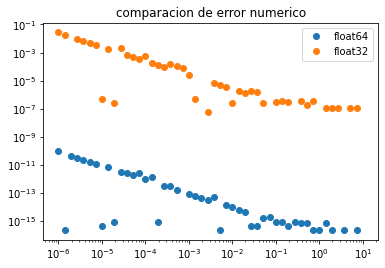

In [72]:
def numeric_error_exp():
  v_epsilon = np.logspace(-6, 1, endpoint=True)
  threshold = 1e-10
  v_res64 = np.zeros(len(v_epsilon))
  v_res32 = np.zeros(len(v_epsilon))

  for i in range(len(v_epsilon)):
    matrix_c = create_matrix_with_epsilon_float64(v_epsilon[i])
    x_obt = solve_sys_EG64(matrix_c, threshold)
    print(x_obt)
    v_res64[i] = np.linalg.norm(x_obt- x_64, np.inf)
      
  for i in range(len(v_epsilon)):
    matrix_c = create_matrix_with_epsilon_float32(v_epsilon[i])
    x_obt = solve_sys_EG32(matrix_c, threshold)
    v_res32[i] = np.linalg.norm(x_obt - x_32, np.inf)

  fig, ax = plt.subplots( nrows=1, ncols=1 )
  ax.loglog(v_epsilon, v_res64, 'o', label = "float64")
  ax.loglog(v_epsilon, v_res32, 'o', label = "float32")
  #ax.plot(v_epsilon, v_res64 - v_res32, label = "float64 - float32")
  # print(v_res64 - v_res32)
  ax.set_title('comparacion de error numerico')
  ax.legend()
  plt.show()
  # plt.savefig('error_numerico_exp')

numeric_error_exp()


## Ejercicio 3

### Datos

In [73]:
matriz_tridiagonal_facil =  np.array(
                   [[ 4,  8,  0, 1],
                    [ 2,  8,  16, 8],
                    [ 0,  8,  2, 13]]).astype(np.float64)

# print(elim_gauss_sin_pivot(matriz_tridiagonal_facil))
solve_sys_EG64(matriz_tridiagonal_facil, 0000.1)

array([-2.96666667,  1.60833333,  0.06666667])

### Implementacion

#### Gauss para Tridiagonales

In [74]:
def elim_gauss_tridiagonal(M): 
   for i in range(0, len(M[0]) - 2):
      if M[i][i] != 0: #CAMBIAR!!! NO SE PUEDE COMPARAR CON CEROOOOOOOO!!! OJO 
        m_ji = M[i+1][i]/M[i][i]
        for k in range(i,len(M[0])):
          M[i+1][k] = M[i+1][k] - m_ji * M[i][k]
      else:
        for jerror in range(i+1, len(M)):
          if M[jerror][i] != 0: #CAMBIAR!!! NO SE PUEDE COMPARAR CON CEROOOOOOOO!!! OJO 
            raise Exception("No se puede realizar la eliminacion gaussiana con i:" + str(i) + " y j: " + str(j))
   return M

M = elim_gauss_tridiagonal(matriz_tridiagonal_facil)
back_subs64(M)

array([-2.96666667,  1.60833333,  0.06666667])

#### Algoritmo de Thomas

##### todo cambiar listas arrays de numpy

In [75]:

def coeficientes_thomas(M):
  coeficientes_computados = []
  for i in range(0, len(M)):
    c_prima = 0
    if i == 0:
      c_prima = M[i][i + 1] /  M[i][i]
    else:
      c_prima = M[i][i + 1] /  (M[i][i] - (M[i][i - 1] * coeficientes_computados[i-1])) #un coeficientes_computados.pop() tambien funcionaria

    coeficientes_computados.append(c_prima)
  return coeficientes_computados

def term_indep_thomas(M, coeficientes_computados):
  terminos_indep_computados = []
  for i in range(0, len(M)):
    d_prima = 0
    if i == 0:
      d_prima = M[i][len(M[i]) - 1] /  M[i][i]
    else:
      d_prima = (M[i][len(M[i]) - 1] - (M[i][i - 1] * terminos_indep_computados[i - 1])) /  (M[i][i] - M[i][i - 1] * coeficientes_computados[i-1]) #un coeficientes_computados.pop() tambien funcionaria

    terminos_indep_computados.append(d_prima)
  return terminos_indep_computados  


def thomas_algorithm_extended(M):
  coeficientes = coeficientes_thomas(M)
  terminos_independientes = term_indep_thomas(M, coeficientes)

  res = np.zeros(len(terminos_independientes))
  res[len(terminos_independientes) - 1] = terminos_independientes[len(terminos_independientes) - 1]
  for i in range(len(res) - 2, -1, -1):
    res[i] = terminos_independientes[i] - (coeficientes[i] * res[i+1]) 
  
  return res

def thomas_algorithm(A, u):

  u_column = u.reshape(-1, 1)  # -1 en reshape permite que numpy calcule la dimensión necesaria
  # Creando la matriz extendida M
  M = np.hstack((A, u_column))
  return thomas_algorithm_extended(M)
  

#### ALGORITMO DE THOMAS - A, B, C, D COMO PARÁMETROS

In [76]:
def thomas_algorithm_consigna(a, b, c, d):
    # Calculo c' y d'
    c_prima = np.zeros(len(c))
    d_prima = np.zeros(len(d))
    for i in range (0, len(c)):
        if i == 0:
            c_prima[i] = c[i] / b[i]
        else:
            c_prima[i] = c[i] / (b[i]-a[i-1]*c_prima[i-1])     

    for i in range (0, len(d)):
        if i == 0:
            d_prima[i] = d[i] / b[i]
        else:
            d_prima[i] = (d[i]-a[i-1]*d_prima[i-1]) / (b[i]-a[i-1]*c_prima[i-1])   

    # Resuelvo
    res = np.zeros(len(d))
    res[len(d) - 1] = d_prima[len(d) - 1]
    for i in range(len(res) - 2, -1, -1):
        res[i] = d_prima[i] - (c_prima[i] * res[i+1]) 
    return res


#### ALGORITMO DE THOMAS - PRECÓMPUTO

In [77]:
class Precomputo(Enum):
    w = auto()
    b = auto()
    c = auto()

def thomas_algorithm_precomputo(a, b, c, d):
    res = np.zeros(len(d))
    for i in range (0, len(a)):
        w = a[i] / b[i]
        b[i+1] =  b[i+1] - w * c[i]
        d[i+1] =  d[i+1] - w * d[i]


    res[len(d) - 1] = d[len(d) - 1] / b[len(d) - 1]
    for i in range(len(res) - 2, -1, -1):
        res[i] = (d[i] - c[i] * res[i+1]) / b[i]
  
    return res

# NOTAR 
# len(a) = n - 1
# len(b) = n
# len(c) = n - 1
# len(d) = n  
def precomputo_de_thomas_algorithm(a, b, c):
    w = np.zeros(len(a))
    for i in range (0, len(a)):
        w[i] = a[i] / b[i]
        b[i+1] =  b[i+1] - w[i] * c[i]

    precomputo = [w, b, c]

    return precomputo

def thomas_algorithm_precomputo(precomputo, d):
    w, b, c = precomputo
    res = np.zeros(len(d))
    for i in range (0, len(w)):
        d[i+1] =  d[i+1] - w[i] * d[i]


    res[len(d) - 1] = d[len(d) - 1] / b[len(b) - 1]
    for i in range(len(res) - 2, -1, -1):
        res[i] = (d[i] - c[i] * res[i+1]) / b[i]
    
    return res

##### CHEQUEO - EJEMPLO MATRIZ

a = [4, 7] ; b = [2, 5, 8] ; c = [3, 6] ; d = [10, 20, 30] <br>

| 2  3  0 | &nbsp;| x | &nbsp;&nbsp;  | 10 | <br>
| 4  5  6 |*| y | = | 20 | <br>
| 0  7  8 | &nbsp;| z | &nbsp;&nbsp;  | 30 | <br>

In [78]:
#Armo la Matriz
M = [[2, 3, 0],[4, 5, 6],[0, 7,8]]
a = np.full(5, -1)
b = np.full(6, 4)
c = np.full(5, -1)

d = np.array([10, 5, 3, 4, 6, 7])

#Chequeo Resultados
# print(thomas_algorithm(M, d))
print(thomas_algorithm_consigna(a, b, c, d))
precomputo = precomputo_de_thomas_algorithm(a, b, c)
print(thomas_algorithm_precomputo(precomputo, d))
# print(thomas_algorithm_precomputo(precomputo, d))

[3.12744761 2.50979045 1.91171419 2.1370663  2.63655101 2.40913775]
[3.29938272 3.19753086 2.59259259 2.77777778 3.33333333 3.        ]


## Ejercicio 4


### Datos

In [79]:
d_a = []

for i in range(0, 101):
    value = 0
    if i == ((101 // 2) + 1):
        value = 4/101
    d_a.append(value)
print(len(d_a))

101


In [80]:

d_b = np.full(101, np.float64(4) / np.float64(101**2))
print(len(d_b))

101


In [81]:
d_c = []
n = 101
for i in range(0, 101):
    value =  (np.float64(-1) + (np.float64(2*i) / np.float64(n - 1))) * (np.float64(12) / np.float64(n*n))
    d_c.append(value)
d_c
print(d_c)

[-0.001176355259288305, -0.001152828154102539, -0.0011293010489167728, -0.0011057739437310068, -0.0010822468385452407, -0.0010587197333594746, -0.0010351926281737085, -0.0010116655229879424, -0.0009881384178021763, -0.0009646113126164102, -0.0009410842074306441, -0.000917557102244878, -0.0008940299970591119, -0.0008705028918733457, -0.0008469757866875796, -0.0008234486815018135, -0.0007999215763160474, -0.0007763944711302812, -0.0007528673659445152, -0.0007293402607587491, -0.000705813155572983, -0.000682286050387217, -0.0006587589452014509, -0.0006352318400156847, -0.0006117047348299186, -0.0005881776296441525, -0.0005646505244583864, -0.0005411234192726203, -0.0005175963140868541, -0.0004940692089010881, -0.00047054210371532204, -0.00044701499852955594, -0.0004234878933437898, -0.0003999607881580237, -0.00037643368297225754, -0.00035290657778649156, -0.00032937947260072546, -0.0003058523674149593, -0.0002823252622291932, -0.00025879815704342706, -0.00023527105185766096, -0.0002117439

In [82]:
d = []
for i in range(0, 101):
    d.append(i)

def create_matrix_with_d(d):
    m_res = np.zeros((101,102)).astype(np.float64)
    for i in range(101):
        m_res[i][i]=-2
        if(i+1<=100):
            m_res[i+1][i]=1
            m_res[i][i+1]=1    
    for i in range(101):
        m_res[i][101]= d[i]
    return m_res  

create_matrix_with_d(d)      

array([[ -2.,   1.,   0., ...,   0.,   0.,   0.],
       [  1.,  -2.,   1., ...,   0.,   0.,   1.],
       [  0.,   1.,  -2., ...,   0.,   0.,   2.],
       ...,
       [  0.,   0.,   0., ...,   1.,   0.,  98.],
       [  0.,   0.,   0., ...,  -2.,   1.,  99.],
       [  0.,   0.,   0., ...,   1.,  -2., 100.]])

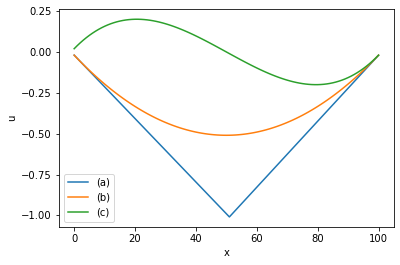

In [83]:
def verificacion_exp(ds):
  a_laplace = np.full(100, 1).astype(np.float64)
  b_laplace = np.full(101, -2).astype(np.float64)
  c_laplace = np.full(100, 1).astype(np.float64)
  x = range(0, 101)
  x_ds = np.zeros((3, 101))
  precomputo = precomputo_de_thomas_algorithm(a_laplace, b_laplace, c_laplace)

  for i in range(3):
    matrix_c = create_matrix_with_d(ds[i])
    x_ds[i] = thomas_algorithm_precomputo(precomputo, ds[i])
    
#   x_ds[2] = thomas_algorithm_precomputo(precomputo, ds[2])
  fig, ax = plt.subplots( nrows=1, ncols=1 )

  plt.plot(x, x_ds[0], label = "(a)")
  plt.plot(x, x_ds[1], label = "(b)")
  plt.plot(x, x_ds[2], label = "(c)")

  yticks = np.arange(-1, 0.50, 0.25)
  ax.set_yticks(yticks) 
  ax.set_xlabel("x")
  ax.set_ylabel("u")
  plt.legend()
  #fig.savefig('verificacion_exp.pdf')
  plt.show()
  
  
  return

verificacion_exp([d_a, d_b, d_c])


In [84]:

# M = create_matrix_with_d(d)
# # La matriz de coeficientes A es todas las filas y todas las columnas excepto la última
# A = M[:, :-1]

# # El vector de términos independientes B es la última columna
# B = M[:, -1]

# sol_pivot = elim_gauss_con_pivot(M, 0.0000001)
# sol_tridiagonal = thomas_algorithm_extended(M)
# solplicita(u_0, A, m):
#     m_res = np.zeros((m,101)).astype(np.float64)
#     u=u_0
#     m_res[0]=u
#     for k in range(1,m):
#         u = elim_gau_numpy = np.linalg.solve(A, B)



# print(sol_pivot)https://github.com/agFrenk/Metodos-TP.gi
# print(sol_tridiagonal)
# print(sol_numpy)

## Ejercicio 5

experimentacion del punto a
generar matrices tridiagonales de distintos tamaños(10, 1e2, 1e3, .. 1e10) o un rango menor si es muy grande 
r=5000

2 casos
1) probar generando el laplaciano de distintos tamaños
2) podemos probar generando matrices tridiagonales aleatorias.

### Datos

In [85]:
def create_matrix_laplaciano(n):
    m_res = np.zeros((n,n)).astype(np.float64)
    for i in range(n):
        m_res[i][i] = -2
        if(i+1<= n - 1):
            m_res[i+1][i] = 1
            m_res[i][i+1] = 1
    return m_res

def create_matrix_laplaciano_with_d(d):
    M = create_matrix_laplaciano(len(d))
    columna_nueva = np.array(d).reshape(len(d), 1)
    matriz_expandida = np.concatenate((M, columna_nueva), axis=1)
    return matriz_expandida



n = 10
def create_laplaciano_testing_instace(n):
    lista = np.arange(1, n+1, 1)
    return create_matrix_laplaciano_with_d(lista)
     


create_laplaciano_testing_instace(n)


array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  4.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  5.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  6.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  7.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  8.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  9.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2., 10.]])

### Implementación

##### Punto A

In [86]:
instance_size = np.arange(20, 500, 20)

resultsEG = np.zeros(len(instance_size))
resultsEGT = np.zeros(len(instance_size))

for i in range(0, len(instance_size)):
    laplacian_matrix = create_laplaciano_testing_instace(n)
    time_res = 0
    for j in range(0, 10):
        tic = time.time()
        res = elim_gauss_con_pivot(laplacian_matrix, 0.000001)
        toc = time.time()
        time_res = min(time_res,  tic - toc)
    resultsEG[i] =  time_res
    
    time_res = 0
    for j in range(0, 10):
        tic = time.time()
        res = elim_gauss_tridiagonal(laplacian_matrix)
        toc = time.time()
        time_res = min(time_res,  tic - toc)
    resultsEGT[i] =  time_res
    


In [87]:

print(resultsEG)

[-0.00219774 -0.00191069 -0.00093389 -0.00068212 -0.00053048 -0.00041246
 -0.00044632 -0.00035834 -0.00041056 -0.00029993 -0.00044227 -0.00029492
 -0.00032115 -0.00030065 -0.00030017 -0.00030088 -0.00038171 -0.00034738
 -0.00041246 -0.00033092 -0.00029874 -0.00042462 -0.00030947 -0.0005784 ]


In [88]:
def plot_eg():
    plt.scatter(instance_size, resultsEG, color='blue', label='EG')  # Puntos para resultsEG
    plt.scatter(instance_size, resultsEGT, color='red', label='EGT')  # Puntos para resultsEGT

    #corregir escala
    plt.yscale('log')
    plt.xscale('log')
    # Añadiendo detalles al gráfico
    plt.title('Comparación de Resultados por Tamaño de Instancia')
    plt.xlabel('Tamaño de Instancia')
    plt.ylabel('Tiempo(s)')
    plt.legend()  # Esto muestra las etiquetas de cada conjunto de puntos

    # Mostrar el gráfico
    plt.show()

def plot_groupedelim_gauss_tridiagonalarange(len(instance_size))  # Las posiciones de los grupos

    # Crear el gráfico de barras agrupadas
    fig, ax = plt.subplots()
    bars1 = ax.bar(index - bar_width/2, resultsEG, bar_width, label='EG', color='#118ab2')
    bars2 = ax.bar(index + bar_width/2, resultsEGT, bar_width, label='EGT', color='#ef476f')

    plt.yscale('log')
    # plt.xscale('log')
    # Añadiendo detalles al gráfico
    ax.set_xlabel('Tamaño de Instancia')
    ax.set_ylabel('Resultados')
    ax.set_title('Comparación de Resultados por Tamaño de Instancia')
    ax.set_xticks(index)
    ax.set_xticklabels(instance_size)
    ax.legend()
    # Mostrar el gráfico
    plt.show()

plot_eg()
plot_grouped_bar_chart()

SyntaxError: invalid syntax (2565047766.py, line 17)

##### Punto B

In [94]:

n = 50 #Tamaño fijo
repeticiones = [] # Cantidad de repeticiones en la iteración i-ésima
for i in range (3,16):
    repeticiones.append(math.floor(1.5**i))
resultsEGTridiagonal = np.zeros(len(repeticiones)) 
resultsEGPrecomputo = np.zeros(len(repeticiones))

a_laplace = np.full(100-1, 1).astype(np.float64)
b_laplace = np.full(100, -2).astype(np.float64)
c_laplace = np.full(100-1, 1).astype(np.float64)
d_laplace = np.arange(1, 100+1, 1).astype(np.float64)
laplacian_matrix = create_laplaciano_testing_instace(100)

for i in range (0, len(repeticiones)):
    time_res = 0
    tic = time.time()
    results = []
    for k in range (0, 10):
        for j in range(0, repeticiones[i]):
            res = elim_gauss_tridiagonal(laplacian_matrix)
        toc = time.time()
        results.append(toc - tic)

    resultsEGTridiagonal[i] = min(results)  

for i in range (0, len(repeticiones)):
    time_res = 0
    tic = time.time()
    results = []
    for k in range (0, 10):
        precomputo = precomputo_de_thomas_algorithm(a_laplace, b_laplace, c_laplace)
        for j in range(0, repeticiones[i]):
            res = thomas_algorithm_precomputo(precomputo, d_laplace)
        toc = time.time()
        results.append(toc - tic)

    resultsEGPrecomputo[i] = min(results)
    

/tmp/ipykernel_2258771/3462356816.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  w[i] = a[i] / b[i]
/tmp/ipykernel_2258771/3462356816.py:39: RuntimeWarning: invalid value encountered in double_scalars
  d[i+1] =  d[i+1] - w[i] * d[i]


13
13
13


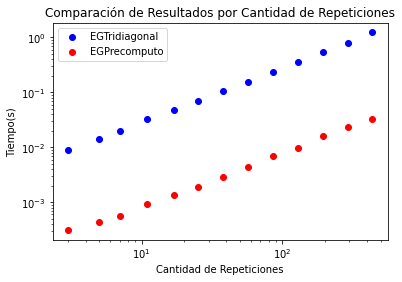

In [95]:
def plot_eg():
    plt.scatter(repeticiones, resultsEGTridiagonal, color='blue', label='EGTridiagonal')  # Puntos para resultsEG
    plt.scatter(repeticiones, resultsEGPrecomputo, color='red', label='EGPrecomputo')  # Puntos para resultsEGT

    #corregir escala
    plt.yscale('log')
    plt.xscale('log')
    # Añadiendo detalles al gráfico
    plt.title('Comparación de Resultados por Cantidad de Repeticiones')
    plt.xlabel('Cantidad de Repeticiones')
    plt.ylabel('Tiempo(s)')
    plt.legend()  # Esto muestra las etiquetas de cada conjunto de puntos

    # Mostrar el gráfico
    plt.show()

# def plot_groupedelim_gauss_tridiagonalarange(len(instance_size))  # Las posiciones de los grupos

#     # Crear el gráfico de barras agrupadas
#     fig, ax = plt.subplots()
#     bars1 = ax.bar(index - bar_width/2, resultsEG, bar_width, label='EG', color='#118ab2')
#     bars2 = ax.bar(index + bar_width/2, resultsEGT, bar_width, label='EGT', color='#ef476f')

#     plt.yscale('log')
#     # plt.xscale('log')
#     # Añadiendo detalles al gráfico
#     ax.set_xlabel('Tamaño de Instancia')
#     ax.set_ylabel('Resultados')
#     ax.set_title('Comparación de Resultados por Tamaño de Instancia')
#     ax.set_xticks(index)
#     ax.set_xticklabels(instance_size)
#     ax.legend()
#     # Mostrar el gráfico
#     plt.show()

print(len(repeticiones))
print(len(resultsEGTridiagonal))
print(len(resultsEGPrecomputo))
plot_eg()
# plot_grouped_bar_chart()

## Ejercicio 6

### Datos

In [ ]:
n = 101
r = 10
m = 1000

def create_u0(n,r):
    u = np.zeros(n).astype(np.float64)
    for i in range(n):
        if(i > (n//2-r) and i < n//2+r):
            u[i]=1
    return u

print(create_u0(n,r))
def create_matrix_explicito(alpha):
    m_res = np.zeros((101,101)).astype(np.float64)
    for i in range(101):
        m_res[i][i]=-2*alpha+1
        if(i+1<=100):
            m_res[i+1][i]=alpha
            m_res[i][i+1]=alpha              
    return m_res  

def create_matrix_implicito(alpha):
    m_res = np.zeros((101,101)).astype(np.float64)
    for i in range(101):
        m_res[i][i]=2*alpha+1
        if(i+1<=100):
            m_res[i+1][i]=alpha*-1
            m_res[i][i+1]=alpha*-1 
    return m_res  




create_matrix_explicito(1)

##### Item a) Caso Explícito

In [ ]:
def mult(A, v):
    v_res = np.zeros(len(v))
    for i in range(len(v)):
        res = 0
        for j in range(len(v)):
            res+= A[i][j]*v[j]
        v_res[i]=res
    return v_res


In [ ]:
create_matrix_laplaciano(0.1)

In [ ]:

def sim_explicita(u_0, A, m):
    m_res = np.zeros((m,101))
    u=u_0
    m_res[0]=u
    for k in range(1,m):c
        u = A @ u
        m_res[k]= u
        #print(m_res[k])
    return m_res   

x= sim_explicita(create_u0(n,r), create_matrix_explicito(0.5), m)

plt.pcolor(x.T)
plt.colorbar()
x

##### Item b) Caso Implícito

In [ ]:
def sim_implicita(u_0, A, m):
    m_res = np.zeros((m,101)).astype(np.float64)
    u=u_0
    m_res[0]=u
    for k in range(1,m):
        u = thomas_algorithm(A, u)
        m_res[k]= u
        #print(m_res[k])
    return m_res   

x = sim_implicita(create_u0(n,r), create_matrix_implicito(1), m)

plt.pcolor(x.T)
plt.colorbar()